In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from datetime import date
from sklearn.cluster import KMeans
import time
from datetime import datetime
import numpy as np
sns.set_theme()

In [3]:
api_string = 'https://api.flipsidecrypto.com/api/v2/queries/77aaf8f7-9d76-4e9e-8792-4fae5dedca92/data/latest'
df = pd.read_json(api_string)

In [4]:
df['first'] = pd.to_datetime(df['first'])
print("Time length of dataset: "+ str(df['first'].max() - df['first'].min()))
df

Time length of dataset: 20 days 01:24:29


,# of Trades,Time Since Last Trade,Total Amount Swapped,first,wallet
0,2,1,1160.845091,2022-04-07 22:36:38,0x391169d848bd7081bb9f19b8a95b7d12601bb22f
1,1,1,0.438895,2022-04-07 22:35:15,0x9466ac6b633344850efaa747a537055f1a5e7a02
2,1,1,299.909550,2022-04-07 22:35:15,0x7b70d0586dd2f6e88bc064e6ffa8adfba0dafab2
3,2,1,6126.682427,2022-04-07 22:35:00,0x8bbeb99e811f40db4818d6e3f69fef9019353827
4,1,1,102.716773,2022-04-07 22:34:57,0x3b5c3844b471e2db95f2fec7fa3b9cbc4d2167ac
...,...,...,...,...,...
99995,1,21,542.006530,2022-03-18 21:12:14,0x40ce3002ef13172d5767f47e8f1f58a2bb868282
99996,1,21,78.884435,2022-03-18 21:12:14,0xcc5e6f37d060b601ad6f7b0f8fbffa5ea3ba91cb
99997,3,19,2438.601431,2022-03-18 21:12:14,0x8fed35a2571268dfcb1029ddd2378e247691864b
99998,1,21,292.533468,2022-03-18 21:12:09,0x9310eeae994bacdfdee1695ca5d6b37b7bc9a338


In [5]:
df_prep = df
mms = MinMaxScaler()
def to_integer(dt_time):
    #getting current deviation from todays date
    return (datetime.now() - dt_time).days + 1
    #return 10000*dt_time.year + 100*dt_time.month + dt_time.day + dt_time.hour / 24 + dt_time.minute / (24 * 60)
    
df_prep['first'] = df_prep['first'].apply(lambda x: to_integer(x))
df_prep['trade/day'] = df_prep['# of Trades'] / df_prep['first']
df_prep['vol/day'] = df_prep['Total Amount Swapped'] / df_prep['first']
df_prep = df_prep.fillna(0)
df_scaled = df_prep
df_scaled[['# of Trades', 'Time Since Last Trade','Total Amount Swapped','first','trade/day','vol/day']] = mms.fit_transform(df_scaled[['# of Trades', 'Time Since Last Trade','Total Amount Swapped','first','trade/day','vol/day']])

In [6]:
df_prep.head()

,# of Trades,Time Since Last Trade,Total Amount Swapped,first,wallet,trade/day,vol/day
0,0.001229,0.0,1.765690e-15,0.0,0x391169d848bd7081bb9f19b8a95b7d12601bb22f,0.020069,1.589121e-14
1,0.000000,0.0,6.675761e-19,0.0,0x9466ac6b633344850efaa747a537055f1a5e7a02,0.009790,6.008184e-18
2,0.000000,0.0,4.561740e-16,0.0,0x7b70d0586dd2f6e88bc064e6ffa8adfba0dafab2,0.009790,4.105566e-15
3,0.001229,0.0,9.318920e-15,0.0,0x8bbeb99e811f40db4818d6e3f69fef9019353827,0.020069,8.387028e-14
4,0.000000,0.0,1.562362e-16,0.0,0x3b5c3844b471e2db95f2fec7fa3b9cbc4d2167ac,0.009790,1.406125e-15


In [7]:
X = df_scaled[['# of Trades', 'Time Since Last Trade','Total Amount Swapped','first','trade/day','vol/day']]
X = X.fillna(0)
km = KMeans(n_clusters=3)
km.fit(X)

KMeans(n_clusters=3)

In [8]:
label = km.predict(X)
df['Label'] = label
df["# of Trades - Log"] = np.log2(df['# of Trades'])
df['Total Amount Swapped - Log'] = np.log2(df['Total Amount Swapped'])

C:\Users\jackl\Anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0.5, 1.0, 'Uniswap New User Segmentation')

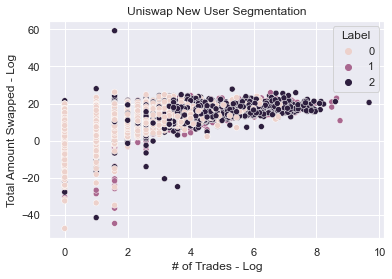

In [9]:
sns.scatterplot(x= "# of Trades - Log",y = 'Total Amount Swapped - Log',hue = 'Label', data = df)
plt.title('Uniswap New User Segmentation')

Text(0.5, 1.0, 'Uniswap New User Segmentation')

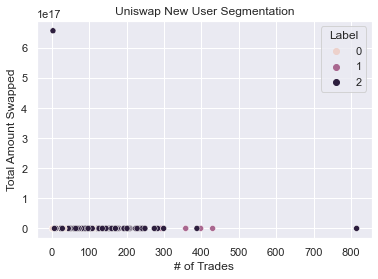

In [10]:
sns.scatterplot(x= '# of Trades',y = 'Total Amount Swapped',hue = 'Label', data = df)
plt.title('Uniswap New User Segmentation')

In [11]:
df.groupby('Label')["# of Trades"].count()

Label
0    32073
1    32795
2    35132
Name: # of Trades, dtype: int64

# Mean

In [12]:
df.groupby('Label').aggregate({'Time Since Last Trade': 'mean',
                             'Total Amount Swapped': 'mean',
                              "# of Trades": 'mean'})

,Time Since Last Trade,Total Amount Swapped,# of Trades
Label,,,
0,16.411623,2.212560e+04,1.987778
1,3.391980,2.411787e+04,3.220460
2,8.168308,2.106725e+13,4.064300


# Median

In [13]:
df.groupby('Label').aggregate({'Time Since Last Trade': 'median',
                             'Total Amount Swapped': 'median',
                              "# of Trades": 'median'})

,Time Since Last Trade,Total Amount Swapped,# of Trades
Label,,,
0,16,471.394143,1
1,3,1016.828006,2
2,9,1042.331825,2


# Max

In [14]:
df.groupby('Label').aggregate({'Time Since Last Trade': 'max',
                             'Total Amount Swapped': 'max',
                              "# of Trades": 'max'})

,Time Since Last Trade,Total Amount Swapped,# of Trades
Label,,,
0,21,7.318066e+07,122
1,7,6.163896e+07,430
2,12,6.574456e+17,815


# Min

In [15]:
df.groupby('Label').aggregate({'Time Since Last Trade': 'min',
                             'Total Amount Swapped': 'min',
                              "# of Trades": 'min'})

,Time Since Last Trade,Total Amount Swapped,# of Trades
Label,,,
0,8,5.905450e-15,1
1,1,3.826059e-14,1
2,1,0.000000e+00,1


# Elbow Method

Text(0, 0.5, 'Sum of Squared Distance')

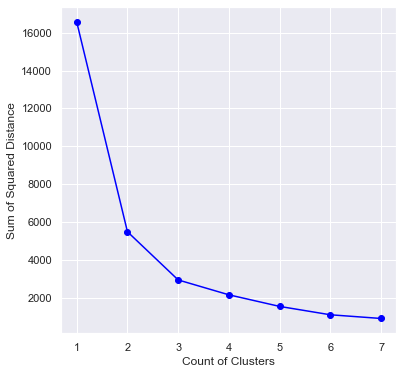

In [16]:
sse = []
for k in range(1, 8):
    km = KMeans(n_clusters=k)
    km.fit(X)
    sse.append(km.inertia_)

plt.figure(figsize=(6, 6))
plt.plot(range(1, 8), sse, '-o', c = 'blue')
plt.xlabel('Count of Clusters')
plt.ylabel('Sum of Squared Distance')